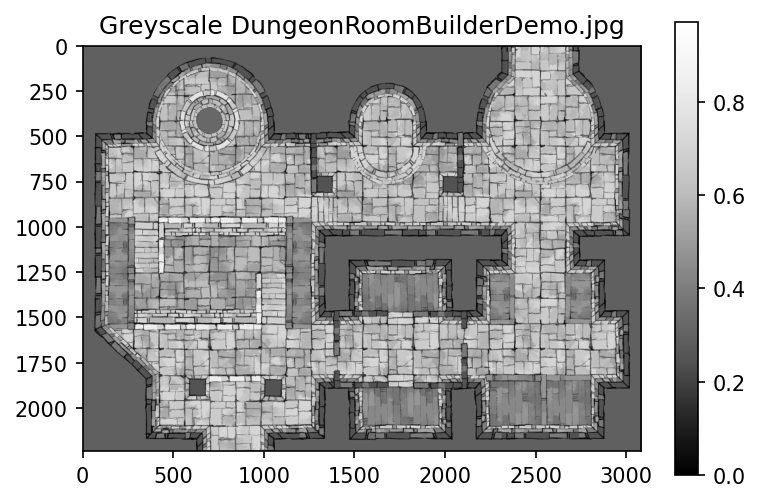

In [1]:
import numpy as np
from skimage import color, io, util
import matplotlib.pyplot as plt

# filename = 'Inn.png'
# filename = 'graph-paper.jpg'
filename = 'DungeonRoomBuilderDemo.jpg'
# filename = 'Inn-laplace-edge.png'
read_image = io.imread('images/'+filename)
img = color.rgb2gray(read_image)
# img = util.invert(img)
fig,ax = plt.subplots(dpi=150)
axim = ax.imshow(img, cmap='Greys_r')
fig.colorbar(axim)
plt.title(f"Greyscale {filename}")
plt.show()

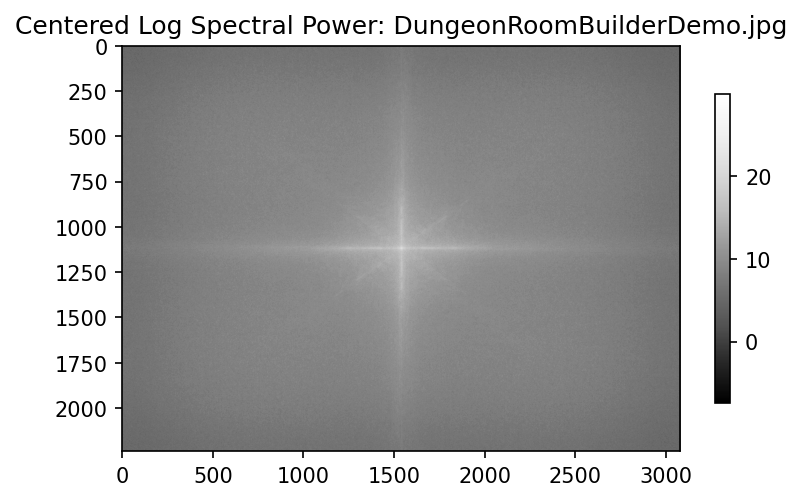

In [2]:
fft2d = np.fft.fft2(img)
fft2d_centered = np.fft.fftshift(fft2d)
spectral_power = np.abs(fft2d)**2
spectral_power_centered = np.abs(fft2d_centered)**2

fig,ax = plt.subplots(dpi=150)
axim = ax.imshow(np.log(spectral_power_centered), cmap='Greys_r')
fig.colorbar(axim, shrink=0.68)
plt.title(f"Centered Log Spectral Power: {filename}")
plt.savefig('images/fft-'+filename, facecolor='white', transparent=False)
plt.show()

<ipython-input-4-3c2abb6069c8>:5: RuntimeWarning: divide by zero encountered in true_divide
  W2 = W_sum - 1/spatialFrequency
<ipython-input-4-3c2abb6069c8>:8: RuntimeWarning: invalid value encountered in log
  ax.plot(spatialFrequency, np.log(1+W2/np.max(W2)), label='Column Summed Spectral Power')


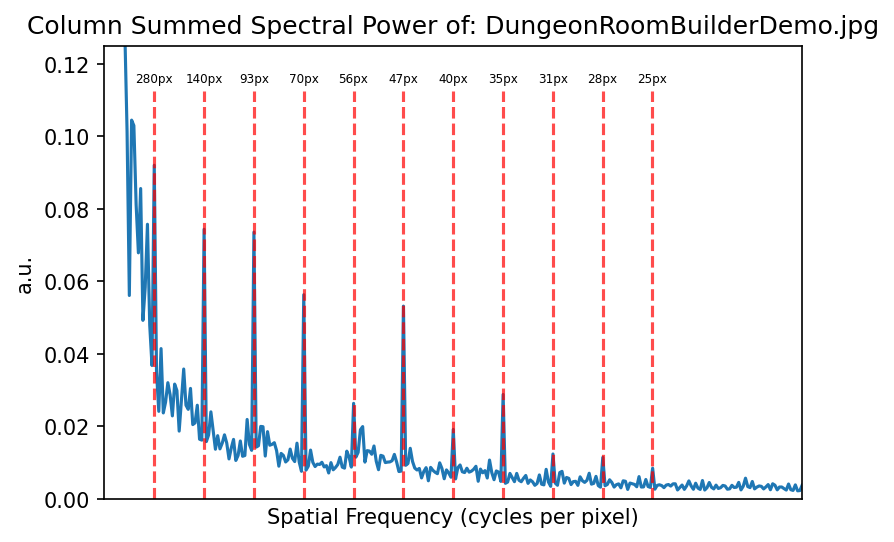

In [4]:
W_sum = np.sum(spectral_power, axis=0)
W_line = np.abs(fft2d[3])**2

spatialFrequency = np.linspace(0,.5,len(W_sum))
W2 = W_sum - 1/spatialFrequency

fig, ax = plt.subplots(dpi=150)
ax.plot(spatialFrequency, np.log(1+W2/np.max(W2)), label='Column Summed Spectral Power')

tile_width = 140
tile_width *= 2 # Multiply by 2 to fudge things

fwidths = [i/tile_width for i in range(1,12)]

for f in fwidths:
    ax.axvline(f,0,0.9, color='red', linestyle='--', alpha=0.7)
    ax.text(f,0.115, str(f'{1/f:.0f}px'), ha='center', size='xx-small')

plt.xticks([])
plt.ylim(0,1.25e-1)
plt.xlim(0,0.05)
plt.ylabel('a.u.')
plt.xlabel('Spatial Frequency (cycles per pixel)')
plt.title(f'Column Summed Spectral Power of: {filename}')
plt.savefig(f'images/fft-sum-{filename}', facecolor='white', transparent=False)
plt.show()